In [9]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pickle

In [5]:
df = pd.read_csv("../data/processed/gladiador_data_procesado.csv")
df.head()

,Wins,Public Favor,Survived,Allegiance Network_Strong
0,11,0.841842,False,1
1,7,0.651044,True,0
2,6,0.593816,True,1
3,6,0.540815,False,1
4,12,0.761651,False,1


In [6]:
df['Survived'] = df['Survived'].astype(int)
df.head()

,Wins,Public Favor,Survived,Allegiance Network_Strong
0,11,0.841842,0,1
1,7,0.651044,1,0
2,6,0.593816,1,1
3,6,0.540815,0,1
4,12,0.761651,0,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9976 entries, 0 to 9975
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wins                       9976 non-null   int64  
 1   Public Favor               9976 non-null   float64
 2   Survived                   9976 non-null   int64  
 3   Allegiance Network_Strong  9976 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 311.9 KB


## MODELO KMEANS

In [21]:
X = df
print(X.shape)

(9976, 4)


In [22]:
K= 2
km_model =KMeans(n_clusters=K, n_init=10, random_state=10).fit(X)
km_model.labels_

array([0, 1, 1, ..., 1, 0, 1], dtype=int32)

In [23]:
df_labels = pd.DataFrame(km_model.labels_, columns=['data'])
df_labels

,data
0,0
1,1
2,1
3,1
4,0
...,...
9971,1
9972,0
9973,1
9974,0


In [15]:
df_labels['data'].value_counts()

data
1    6032
0    3944
Name: count, dtype: int64

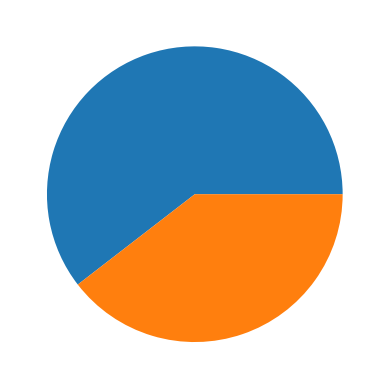

In [24]:
plt.pie(df_labels["data"].value_counts())
plt.show()